In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.dates as mdates
import lingam

from graphviz import Digraph
from lingam.utils import make_dot
from IPython.display import Image, display, Markdown
from pyvis.network import Network
from IPython.display import display

In [2]:
# Edges
df_edges_plant = pd.read_csv("../data/SupplyGraph/Edges/Edges (Plant).csv")
df_edges_product_group = pd.read_csv("../data/SupplyGraph/Edges/Edges (Product Group).csv")
df_edges_product_subgroup = pd.read_csv("../data/SupplyGraph/Edges/Edges (Product Sub-Group).csv")
df_edges_storage_location = pd.read_csv("../data/SupplyGraph/Edges/Edges (Storage Location).csv")

# Nodes
df_nodes_productgroup_and_subgroup = pd.read_csv("../data/SupplyGraph/Nodes/Node Types (Product Group and Subgroup).csv")
df_nodes_plant_and_storage = pd.read_csv("../data/SupplyGraph/Nodes/Nodes Type (Plant & Storage).csv")
df_nodes = pd.read_csv("../data/SupplyGraph/Nodes/Nodes.csv")
# df_nodes_index = pd.read_csv("../data/SupplyGraph/Nodes/NodesIndex.csv")

# Temporal
df_delivery_to_distributor = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Delivery To distributor.csv")
df_factory_issue = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Factory Issue.csv")
df_production = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Production.csv")
df_sales_order = pd.read_csv("../data/SupplyGraph/Temporal Data/Unit/Sales Order.csv")

In [37]:
# Create a generic function to process any temporal dataframe
def process_temporal_data(df, column_name, product="all", entry_date="all"):
    """
    Generic function to process temporal data (production, sales, factory issue, delivery)
    """

    # Ensure Date column is datetime
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Determine columns to select
    if product == "all":
        cols = df.columns.tolist()
    else:
        if product not in df.columns:
            raise ValueError(f"Product '{product}' not found in dataframe columns")
        cols = ["Date", product]
    
    # Filter by date
    if entry_date == "all":
        rows = df[cols]
    else:
        filter_rows = df['Date'].dt.date == pd.to_datetime(entry_date).date()
        rows = df.loc[filter_rows, cols]
    
    # Pivot wide -> long
    long_format = rows.melt(id_vars='Date', var_name='Product', value_name=column_name).dropna()
    
    return rows, long_format

# Process all temporal dataframes for the same product and date
product_to_query = "all" # "SOS005L04P" # 'all'
date_to_query = '2023-01-05' # 'all'

print("=" * 80)
print(f"Processing temporal data for Product: {product_to_query}, Date: {date_to_query}")
print("=" * 80)

# Sales Order
display(Markdown("**Sales Order -> Product**"))
sales_wide, sales_long = process_temporal_data(df_sales_order, 'Sales', product_to_query, date_to_query)
# display(sales_wide)
display(sales_long)

# Production
display(Markdown("**Product -> Production**"))
prod_wide, prod_long = process_temporal_data(df_production, 'Production', product_to_query, date_to_query)
# display(prod_wide)
display(prod_long)

# Factory Issue
display(Markdown("**Product -> Factory Issue**"))
factory_wide, factory_long = process_temporal_data(df_factory_issue, 'FactoryIssue', product_to_query, date_to_query)
# display(factory_wide)
display(factory_long)

# Delivery to Distributor
display(Markdown("**Product -> Distributor**"))
delivery_wide, delivery_long = process_temporal_data(df_delivery_to_distributor, 'Delivery', product_to_query, date_to_query)
# display(delivery_wide)
display(delivery_long)


Processing temporal data for Product: all, Date: 2023-01-05


**Sales Order -> Product**

,Date,Product,Sales
0,2023-01-05,SOS008L02P,233.000000
1,2023-01-05,SOS005L04P,14864.000000
2,2023-01-05,SOS003L04P,1783.000000
3,2023-01-05,SOS002L09P,11923.110024
4,2023-01-05,SOS001L12P,16931.000000
5,2023-01-05,SOS500M24P,6357.000000
6,2023-01-05,SOS250M48P,555.000000
7,2023-01-05,SOP001L12P,63.000000
8,2023-01-05,POV005L04P,210.000000
9,2023-01-05,POV002L09P,374.000000


**Product -> Production**

,Date,Product,Production
0,2023-01-05,SOS008L02P,0
1,2023-01-05,SOS005L04P,16000
2,2023-01-05,SOS003L04P,2022
3,2023-01-05,SOS002L09P,16000
4,2023-01-05,SOS001L12P,15156
5,2023-01-05,SOS500M24P,8000
6,2023-01-05,SOS250M48P,0
7,2023-01-05,SOP001L12P,400
8,2023-01-05,POV005L04P,500
9,2023-01-05,POV002L09P,404


**Product -> Factory Issue**

,Date,Product,FactoryIssue
0,2023-01-05,SOS008L02P,320.0
1,2023-01-05,SOS005L04P,9787.0
2,2023-01-05,SOS003L04P,1120.0
3,2023-01-05,SOS002L09P,8875.0
4,2023-01-05,SOS001L12P,12414.0
5,2023-01-05,SOS500M24P,4576.0
6,2023-01-05,SOS250M48P,0.0
7,2023-01-05,SOP001L12P,0.0
8,2023-01-05,POV005L04P,195.0
9,2023-01-05,POV002L09P,470.0


**Product -> Distributor**

,Date,Product,Delivery
0,2023-01-05,SOS008L02P,351.500000
1,2023-01-05,SOS005L04P,8843.250000
2,2023-01-05,SOS003L04P,896.000000
3,2023-01-05,SOS002L09P,7193.276993
4,2023-01-05,SOS001L12P,9933.416938
5,2023-01-05,SOS500M24P,4089.000000
6,2023-01-05,SOS250M48P,0.000000
7,2023-01-05,SOP001L12P,43.417029
8,2023-01-05,POV005L04P,151.000000
9,2023-01-05,POV002L09P,340.000000


In [50]:
display(df_sales_order)

display(Markdown("**Sales Order -> Product**"))

# Display and pivot df_sales_order
df_sales_order['Date'] = pd.to_datetime(df_sales_order['Date'])

# Long format (one row per Date/Product)
df_sales_order_pivot = df_sales_order.melt(id_vars='Date', var_name='Product', value_name='Sales').dropna()
display(df_sales_order_pivot)

,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01,1355.0,12594.00,1949.0,14556.000000,21394.000000,8552.0,1159.0,100.000000,348.0,...,25,1507.000,225.0,0,0,0,0,0,0,0
1,2023-01-02,338.0,11677.00,1842.0,13085.000000,17059.000000,7207.0,502.0,160.000000,160.0,...,0,602.000,109.0,0,0,0,0,0,0,0
2,2023-01-03,226.0,8551.00,1135.0,8573.107971,12178.000000,4234.0,290.0,278.000000,190.0,...,0,1363.000,100.0,0,0,0,0,12,0,0
3,2023-01-04,223.5,10667.25,967.0,8487.110990,10920.082971,4046.0,485.0,58.417029,236.0,...,2,756.667,130.0,0,0,0,0,25,0,0
4,2023-01-05,233.0,14864.00,1783.0,11923.110024,16931.000000,6357.0,555.0,63.000000,210.0,...,37,1398.000,155.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2023-08-05,15.0,1049.25,102.0,387.000000,482.000000,109.0,0.0,8.000000,165.0,...,0,83.000,0.0,0,0,0,0,0,0,0
217,2023-08-06,1321.0,7468.00,1141.0,5046.000000,6716.000000,2897.0,463.0,30.000000,435.0,...,41,1407.000,120.0,0,0,0,0,0,0,0
218,2023-08-07,230.0,5172.00,559.0,3696.000000,15579.330072,2385.0,467.0,30.000000,355.0,...,0,800.083,25.0,0,0,0,10,0,0,0
219,2023-08-08,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0,0.000,0.0,0,0,0,0,0,0,0


**Sales Order -> Product**

,Date,Product,Sales
0,2023-01-01,SOS008L02P,1355.0
1,2023-01-02,SOS008L02P,338.0
2,2023-01-03,SOS008L02P,226.0
3,2023-01-04,SOS008L02P,223.5
4,2023-01-05,SOS008L02P,233.0
...,...,...,...
9056,2023-08-05,EEA200G24P,0.0
9057,2023-08-06,EEA200G24P,0.0
9058,2023-08-07,EEA200G24P,0.0
9059,2023-08-08,EEA200G24P,0.0


In [38]:
display(df_production)

display(Markdown("**Production Quantity based on unit**"))

# Display and pivot df_production
df_production['Date'] = pd.to_datetime(df_production['Date'])

# Long format (one row per Date/Product)
df_production_pivot = df_production.melt(id_vars='Date', var_name='Product', value_name='Production Quantity').dropna()
display(df_production_pivot)


,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01,1008,3008,0,2034,4016,1003,0,0,0,...,48,1000,0,0,0,0,0,0,0,0
1,2023-01-02,1014,6000,0,6000,7000,3500,0,0,154,...,0,300,0,0,0,0,0,25,0,0
2,2023-01-03,0,4012,0,5053,10000,8500,0,0,0,...,0,300,0,0,0,0,0,0,0,0
3,2023-01-04,0,10497,2014,15478,10618,7281,0,10,0,...,0,100,0,0,0,0,0,0,0,0
4,2023-01-05,0,16000,2022,16000,15156,8000,0,400,500,...,0,1000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2023-08-05,0,5006,0,5231,5005,1203,0,0,112,...,0,500,80,0,0,0,0,0,0,0
217,2023-08-06,1500,3172,0,0,4001,1000,0,504,170,...,500,300,0,0,0,0,0,60,0,0
218,2023-08-07,504,1500,1000,0,3004,2000,0,0,350,...,50,0,0,0,0,0,0,0,0,0
219,2023-08-08,0,0,1519,0,1310,1024,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Production Quantity based on unit**

,Date,Product,Production Quantity
0,2023-01-01,SOS008L02P,1008
1,2023-01-02,SOS008L02P,1014
2,2023-01-03,SOS008L02P,0
3,2023-01-04,SOS008L02P,0
4,2023-01-05,SOS008L02P,0
...,...,...,...
9056,2023-08-05,EEA200G24P,0
9057,2023-08-06,EEA200G24P,0
9058,2023-08-07,EEA200G24P,0
9059,2023-08-08,EEA200G24P,0


In [49]:
# Display and pivot df_sales_order
df_factory_issue['Date'] = pd.to_datetime(df_factory_issue['Date'])

display(Markdown("**Product -> Factory issue**"))
print("Number of units shipped from factories")

# Long format (one row per Date/Product)
df_factory_issue_pivot = df_factory_issue.melt(id_vars='Date', var_name='Product', value_name='Factory_Issue').dropna()
display(df_factory_issue_pivot)

**Product -> Factory issue**

Number of units shipped from factories


,Date,Product,Factory_Issue
0,2023-01-01,SOS008L02P,220.0
1,2023-01-02,SOS008L02P,485.0
2,2023-01-03,SOS008L02P,520.0
3,2023-01-04,SOS008L02P,305.0
4,2023-01-05,SOS008L02P,320.0
...,...,...,...
9056,2023-08-05,EEA200G24P,0.0
9057,2023-08-06,EEA200G24P,0.0
9058,2023-08-07,EEA200G24P,0.0
9059,2023-08-08,EEA200G24P,0.0


In [47]:
df_delivery_to_distributor['Date'] = pd.to_datetime(df_delivery_to_distributor['Date'])

display(Markdown("**Product -> distributor**"))
print("Number of products shipped to distributor")


# Display and pivot df_sales_order
df_delivery_to_distributor['Date'] = pd.to_datetime(df_delivery_to_distributor['Date'])

# Long format (one row per Date/Product)
df_delivery_to_distributor_pivot = df_delivery_to_distributor.melt(id_vars='Date', var_name='Product', value_name='distributor').dropna()
display(df_delivery_to_distributor_pivot.head(221))

**Product -> distributor**

Number of products shipped to distributor


,Date,Product,distributor
0,2023-01-01,SOS008L02P,455.0
1,2023-01-02,SOS008L02P,327.0
2,2023-01-03,SOS008L02P,523.5
3,2023-01-04,SOS008L02P,158.0
4,2023-01-05,SOS008L02P,351.5
...,...,...,...
216,2023-08-05,SOS008L02P,606.0
217,2023-08-06,SOS008L02P,68.0
218,2023-08-07,SOS008L02P,137.0
219,2023-08-08,SOS008L02P,130.0


<br> <br> <br>

### Product -> Product Group / Product Sub Group

```python
Product
    ├── Product Group
    ├── Product Sub Group
```

Product **belongs to** what Product Group and Product Sub Group 

In [51]:
display(df_nodes_productgroup_and_subgroup)

display(Markdown("**Product -> Group / Sub Group**"))

# Filter and display Group/Sub-Group for the selected product
product_to_query = "SOS005L04P"
match = df_nodes_productgroup_and_subgroup.loc[
    df_nodes_productgroup_and_subgroup['Node'] == product_to_query,
    ['Group', 'Sub-Group']
]
if not match.empty:
    display(match.reset_index(drop=True))
else:
    display(Markdown(f"**No Group/Sub-Group found for product: {product_to_query}**"))

,Node,Group,Sub-Group
0,SOS008L02P,S,SOS
1,SOS005L04P,S,SOS
2,SOS003L04P,S,SOS
3,SOS002L09P,S,SOS
4,SOS001L12P,S,SOS
5,SOS500M24P,S,SOS
6,SOS250M48P,S,SOS
7,SOP001L12P,S,SOP
8,POV005L04P,P,POV
9,POV002L09P,P,POV


**Product -> Group / Sub Group**

,Group,Sub-Group
0,S,SOS


<br> <br> <br>

### product -> Plant
Products **produced at** Production facility
```python
Product
    └── Product Facility
```

<br> 

### product ->  Storage Location
Products **stored at** storage location
```python
Product
    └── Storage Location



```

In [9]:
df_nodes_plant_and_storage.drop_duplicates()

,Node,Plant,Storage Location
0,POV002L09P,2120,2030.0
1,SOS001L12P,2120,2030.0
2,POP002L09P,2120,2030.0
3,POP001L12P,2120,2030.0
6,POV001L24P,2120,2030.0
...,...,...,...
6540,MAC1K25P,1915,1530.0
6541,EEA500G12P,2120,2030.0
6542,EEA200G24P,2120,2030.0
6543,EEA500G12P,1920,1130.0


In [53]:
display(df_nodes_plant_and_storage)

display(Markdown("**Product -> Plant / Storage Location**"))

display(Markdown("**Product:** SOS005L04P"))
# Filter and display Group/Sub-Group for the selected product
product_to_query = "SOS005L04P"
match = df_nodes_plant_and_storage.loc[
    df_nodes_plant_and_storage['Node'] == product_to_query,
    ['Plant', 'Storage Location']
]
display(match)

display(Markdown("**Drop duplicate**"))
display(match.drop_duplicates())

,Node,Plant,Storage Location
0,POV002L09P,2120,2030.0
1,SOS001L12P,2120,2030.0
2,POP002L09P,2120,2030.0
3,POP001L12P,2120,2030.0
4,POP001L12P,2120,2030.0
...,...,...,...
6540,MAC1K25P,1915,1530.0
6541,EEA500G12P,2120,2030.0
6542,EEA200G24P,2120,2030.0
6543,EEA500G12P,1920,1130.0


**Product -> Plant / Storage Location**

**Product:** SOS005L04P

,Plant,Storage Location
10,2120,2030.0
21,2111,1130.0
23,2120,2030.0
32,2121,2130.0
40,2120,2030.0
...,...,...
6489,2116,1630.0
6492,2120,2030.0
6499,2111,1130.0
6500,2111,1130.0


**Drop duplicate**

,Plant,Storage Location
10,2120,2030.0
21,2111,1130.0
32,2121,2130.0
66,2119,1930.0
82,2114,1430.0
88,2116,1630.0
182,2112,1230.0
185,2117,1730.0
250,2115,1530.0
332,2103,330.0


In [ ]:
def merge_product_data(products=None, start_date=None, end_date=None):
    """
    Merge all dataframes to create a comprehensive product dataset
    
    Args:
        products: Single product code (str), list of products, or None for all products
        start_date: Start date (str or datetime) or None for no lower bound
        end_date: End date (str or datetime) or None for no upper bound
    
    Returns:
        pandas.DataFrame: Merged dataframe with all product information
       
    """
    
    # 1. Handle product selection
    if products is None:
        # All products from temporal data
        product_list = [col for col in df_sales_order.columns if col != 'Date']
    elif isinstance(products, str):
        # Single product
        product_list = [products]
    elif isinstance(products, list):
        # Multiple products
        product_list = products
    else:
        raise ValueError("products must be None, str, or list of str")
    
    # 2. Prepare temporal dataframes with date filtering
    temporal_dfs_dict = {
        'sales_order': df_sales_order.copy(),
        'production': df_production.copy(),
        'factory_issue': df_factory_issue.copy(),
        'delivery_to_distributor': df_delivery_to_distributor.copy()
    }
    
    # Convert Date columns and apply date filters
    for name, df in temporal_dfs_dict.items():
        df['Date'] = pd.to_datetime(df['Date'])
        
        if start_date is not None:
            df = df[df['Date'] >= pd.to_datetime(start_date)]
        if end_date is not None:
            df = df[df['Date'] <= pd.to_datetime(end_date)]
        
        temporal_dfs_dict[name] = df
    
    # 3. Melt each temporal dataframe to long format
    melted_dfs = []
    
    for name, df in temporal_dfs_dict.items():
        # Select only Date and requested products
        cols = ['Date'] + [p for p in product_list if p in df.columns]
        df_subset = df[cols].copy()
        
        # Melt to long format
        df_long = df_subset.melt(
            id_vars='Date',
            var_name='Product',
            value_name=name
        )
        
        melted_dfs.append(df_long)
    
    # 4. Merge all temporal data on Date and Product
    merged = melted_dfs[0]
    for df_melt in melted_dfs[1:]:
        # merged = merged.merge(df_melt, on=['Date', 'Product'], how='outer')
        merged = merged.merge(df_melt, on=['Date', 'Product'], how='outer')
    
    # 5. Add Product Group and Subgroup
    if not df_nodes_productgroup_and_subgroup.empty:
        classification = df_nodes_productgroup_and_subgroup[['Node', 'Group', 'Sub-Group']].copy()
        classification = classification.rename(columns={'Node': 'Product'})
        merged = merged.merge(classification, on='Product', how='left')
    
    # 6. Add Plant information (count of unique plants per product)
    if not df_nodes_plant_and_storage.empty:
        # Get unique plants per product
        plant_counts = df_nodes_plant_and_storage.groupby('Node')['Plant'].nunique().reset_index()
        plant_counts.columns = ['Product', 'num_plants']
        merged = merged.merge(plant_counts, on='Product', how='left')
        
        # Get unique storage locations per product
        storage_counts = df_nodes_plant_and_storage.groupby('Node')['Storage Location'].nunique().reset_index()
        storage_counts.columns = ['Product', 'num_storage_locations']
        merged = merged.merge(storage_counts, on='Product', how='left')
    
    # 7. Reorder columns
    column_order = [
        'Date',
        'Product',
        'Group',
        'Sub-Group',
        'sales_order',
        'production',
        'factory_issue',
        'delivery_to_distributor',
        'num_plants',
        'num_storage_locations'
    ]
    
    # Only include columns that exist
    final_columns = [col for col in column_order if col in merged.columns]
    merged = merged[final_columns]
    
    # 8. Sort and reset index
    merged = merged.sort_values(['Date', 'Product']).reset_index(drop=True)
    
    return merged


# ========== USAGE EXAMPLES ==========

# Single product, specific date
print("Single product, specific date")
df1 = merge_product_data(
    products='SOS005L04P',
    start_date='2023-01-05',
    end_date='2023-01-05'
)
display(df1)



# All products, specific date range
print("\nAll products, specific date range")
df2 = merge_product_data(
    start_date='2023-02-01',
    end_date='2023-02-05'
)
print(f"Shape: {df2.shape}")
display(df2)



Single product, specific date


,Date,Product,Group,Sub-Group,sales_order,production,factory_issue,delivery_to_distributor,num_plants,num_storage_locations
0,2023-01-05,SOS005L04P,S,SOS,14864.0,16000,9787.0,8843.25,12,12



All products, specific date range
Shape: (210, 10)


,Date,Product,Group,Sub-Group,sales_order,production,factory_issue,delivery_to_distributor,num_plants,num_storage_locations
0,2023-02-01,AT5X5K,A,AT,180.40,700,1450.000,1593.000000,12.0,12.0
1,2023-02-01,ATN01K24P,A,ATN,2695.13,3000,3813.000,2606.000000,13.0,13.0
2,2023-02-01,ATN02K12P,A,ATN,311.75,1000,630.000,1070.000000,9.0,9.0
3,2023-02-01,ATPA1K24P,A,ATPA,0.00,0,0.000,0.000000,1.0,1.0
4,2023-02-01,ATPPCH5X5K,A,ATPPCH,0.00,0,0.000,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
205,2023-02-05,SOS003L04P,S,SOS,2558.00,2000,1130.000,1044.250000,12.0,12.0
206,2023-02-05,SOS005L04P,S,SOS,24629.00,10500,12455.500,9460.500000,12.0,12.0
207,2023-02-05,SOS008L02P,S,SOS,2018.00,2067,2262.000,1211.500000,10.0,10.0
208,2023-02-05,SOS250M48P,S,SOS,769.00,31,77.000,209.000000,7.0,7.0



Single product, specific date with larger nodes


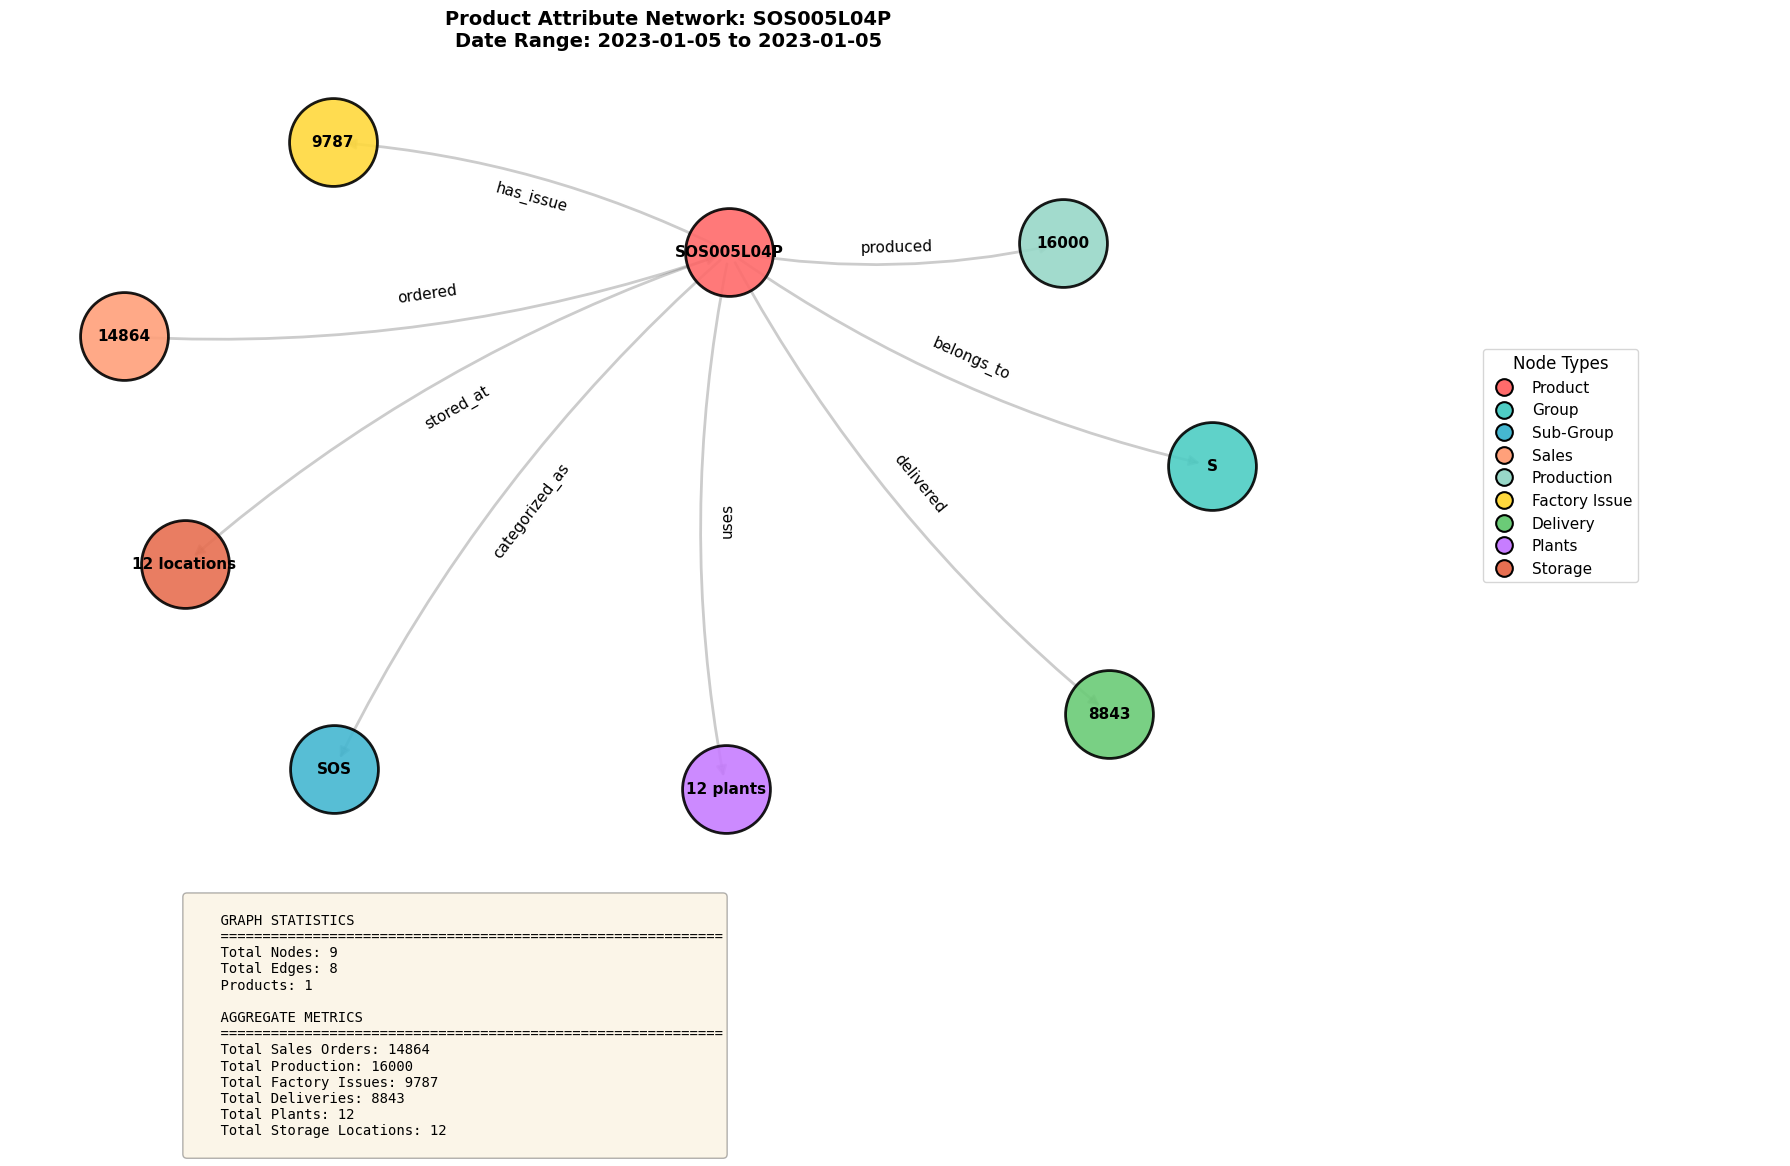


DETAILED PRODUCT INFORMATION

Product: SOS005L04P
  Group: S
  Sub-Group: SOS
  Sales Orders: 14864
  Production: 16000
  Factory Issues: 9787
  Deliveries: 8843
  Number of Plants: 12
  Number of Storage Locations: 12

Three products with compact styling


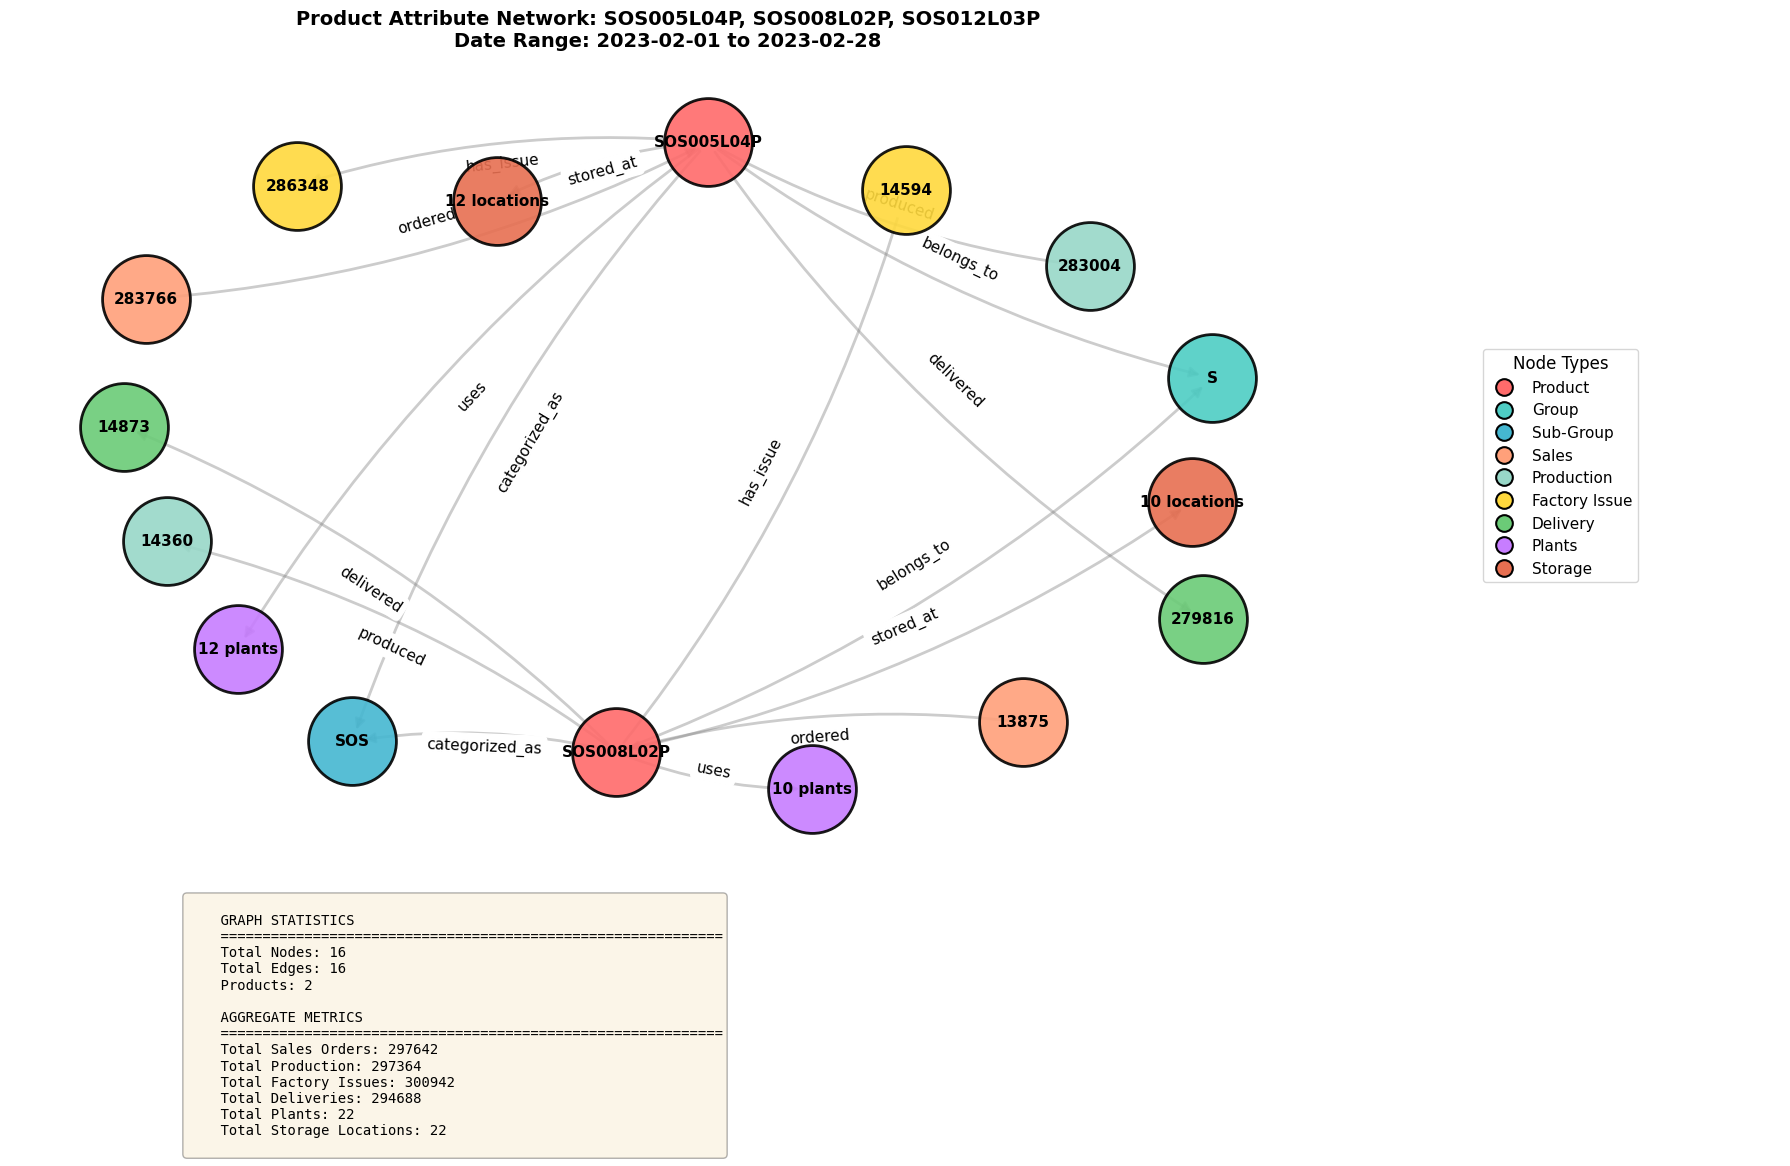


DETAILED PRODUCT INFORMATION

Product: SOS005L04P
  Group: S
  Sub-Group: SOS
  Sales Orders: 283766
  Production: 283004
  Factory Issues: 286348
  Deliveries: 279816
  Number of Plants: 12
  Number of Storage Locations: 12

Product: SOS008L02P
  Group: S
  Sub-Group: SOS
  Sales Orders: 13875
  Production: 14360
  Factory Issues: 14594
  Deliveries: 14873
  Number of Plants: 10
  Number of Storage Locations: 10


In [13]:
def visualize_product_attributes(products, start_date=None, end_date=None, figsize=(18, 12),
                                node_size=1500, node_font_size=9, edge_label_font_size=7):
    """
    Visualize product attributes and their relationships as a network graph
    """
    
    # Get merged data
    df = merge_product_data(products=products, start_date=start_date, end_date=end_date)
    
    # Aggregate data if multiple dates
    df_agg = df.groupby('Product').agg({
        'Group': 'first',
        'Sub-Group': 'first',
        'sales_order': 'sum',
        'production': 'sum',
        'factory_issue': 'sum',
        'delivery_to_distributor': 'sum',
        'num_plants': 'first',
        'num_storage_locations': 'first'
    }).reset_index()
    
    # Handle NaN values
    df_agg = df_agg.fillna({'Group': 'Unknown', 'Sub-Group': 'Unknown', 
                             'sales_order': 0, 'production': 0, 
                             'factory_issue': 0, 'delivery_to_distributor': 0,
                             'num_plants': 0, 'num_storage_locations': 0})
    
    # Create directed graph
    G = nx.DiGraph()
    
    # Define node types and their colors
    node_colors = {
        'Product': '#FF6B6B',
        'Group': '#4ECDC4',
        'Sub-Group': '#45B7D1',
        'Sales': '#FFA07A',
        'Production': '#98D8C8',
        'Factory Issue': '#FFD93D',
        'Delivery': '#6BCB77',
        'Plants': '#C77DFF',
        'Storage': '#E76F51'
    }
    
    # ...existing code for adding nodes and edges...
    # Add nodes and edges for each product
    for _, row in df_agg.iterrows():
        product = row['Product']
        G.add_node(product, node_type='Product', label=product)
        
        group = str(row['Group'])
        group_node = f"Group: {group}"
        G.add_node(group_node, node_type='Group', label=group)
        G.add_edge(product, group_node, relationship='belongs_to', weight=1)
        
        subgroup = str(row['Sub-Group'])
        subgroup_node = f"SubGroup: {subgroup}"
        G.add_node(subgroup_node, node_type='Sub-Group', label=subgroup)
        G.add_edge(product, subgroup_node, relationship='categorized_as', weight=1)
        
        sales = float(row['sales_order'])
        if sales > 0:
            sales_node = f"Sales: {sales:.0f}"
            G.add_node(sales_node, node_type='Sales', label=f"{sales:.0f}", value=sales)
            G.add_edge(sales_node, product, relationship='ordered', weight=1)
        
        production = float(row['production'])
        if production > 0:
            prod_node = f"Production: {production:.0f}"
            G.add_node(prod_node, node_type='Production', label=f"{production:.0f}", value=production)
            G.add_edge(product, prod_node, relationship='produced', weight=1)
        
        factory = float(row['factory_issue'])
        if factory > 0:
            factory_node = f"Issue: {factory:.0f}"
            G.add_node(factory_node, node_type='Factory Issue', label=f"{factory:.0f}", value=factory)
            G.add_edge(product, factory_node, relationship='has_issue', weight=1)
        
        delivery = float(row['delivery_to_distributor'])
        if delivery > 0:
            delivery_node = f"Delivery: {delivery:.0f}"
            G.add_node(delivery_node, node_type='Delivery', label=f"{delivery:.0f}", value=delivery)
            G.add_edge(product, delivery_node, relationship='delivered', weight=1)
        
        plants = int(row['num_plants'])
        if plants > 0:
            plants_node = f"Plants: {plants}"
            G.add_node(plants_node, node_type='Plants', label=f"{plants} plants", value=plants)
            G.add_edge(product, plants_node, relationship='uses', weight=1)
        
        storage = int(row['num_storage_locations'])
        if storage > 0:
            storage_node = f"Storage: {storage}"
            G.add_node(storage_node, node_type='Storage', label=f"{storage} locations", value=storage)
            G.add_edge(product, storage_node, relationship='stored_at', weight=1)
    
    # Create layout
    pos = nx.spring_layout(G, k=3, iterations=50, seed=42)
    
    # Create figure with two subplots
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[3, 1])
    
    # Main graph plot
    ax_main = fig.add_subplot(gs[0, 0])
    
    # Draw edges with varying widths
    edge_widths = [G[u][v].get('weight', 1) * 2 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.4, 
                          edge_color='gray', arrows=True, 
                          arrowsize=15, ax=ax_main, connectionstyle='arc3,rad=0.1')
    
    # Draw nodes by type with CUSTOMIZABLE size
    for node_type, color in node_colors.items():
        nodes = [n for n in G.nodes() if G.nodes[n].get('node_type') == node_type]
        if nodes:
            nx.draw_networkx_nodes(G, pos, nodelist=nodes, 
                                 node_color=color, node_size=node_size,  # Use parameter
                                 alpha=0.9, edgecolors='black', linewidths=2, ax=ax_main)
    
    # Draw labels with CUSTOMIZABLE font size
    labels = {node: G.nodes[node].get('label', node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=node_font_size,  # Use parameter
                           font_weight='bold', font_color='black', ax=ax_main)
    
    # Edge labels with CUSTOMIZABLE font size
    edge_labels = {(u, v): G[u][v].get('relationship', '') for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=edge_label_font_size, ax=ax_main)  # Use parameter
    
    # ...existing code for title, legend, stats...
    # Title
    date_str = ""
    if start_date and end_date:
        date_str = f"\nDate Range: {start_date} to {end_date}"
    elif start_date:
        date_str = f"\nFrom: {start_date}"
    elif end_date:
        date_str = f"\nTo: {end_date}"
    else:
        date_str = "\nAll Dates (Aggregated)"
    
    product_str = products if isinstance(products, str) else ', '.join(products[:3]) + ('...' if len(products) > 3 else '')
    ax_main.set_title(f'Product Attribute Network: {product_str}{date_str}', 
                     fontsize=14, fontweight='bold', pad=20)
    ax_main.axis('off')
    
    # Legend
    ax_legend = fig.add_subplot(gs[0, 1])
    ax_legend.axis('off')
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor=color, markersize=12, 
                   label=node_type, markeredgecolor='black', markeredgewidth=1.5)
        for node_type, color in node_colors.items()
    ]
    ax_legend.legend(handles=legend_elements, loc='center', fontsize=11, 
                    title='Node Types', title_fontsize=12, frameon=True)
    
    # Statistics table
    ax_stats = fig.add_subplot(gs[1, :])
    ax_stats.axis('off')
    
    stats_text = f"""
    GRAPH STATISTICS
    {'='*60}
    Total Nodes: {G.number_of_nodes()}
    Total Edges: {G.number_of_edges()}
    Products: {len(df_agg)}
    
    AGGREGATE METRICS
    {'='*60}
    Total Sales Orders: {df_agg['sales_order'].sum():.0f}
    Total Production: {df_agg['production'].sum():.0f}
    Total Factory Issues: {df_agg['factory_issue'].sum():.0f}
    Total Deliveries: {df_agg['delivery_to_distributor'].sum():.0f}
    Total Plants: {df_agg['num_plants'].sum():.0f}
    Total Storage Locations: {df_agg['num_storage_locations'].sum():.0f}
    """
    
    ax_stats.text(0.1, 0.5, stats_text, fontsize=10, family='monospace', 
                 verticalalignment='center', bbox=dict(boxstyle='round', 
                 facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*80)
    print("DETAILED PRODUCT INFORMATION")
    print("="*80)
    for _, row in df_agg.iterrows():
        print(f"\nProduct: {row['Product']}")
        print(f"  Group: {row['Group']}")
        print(f"  Sub-Group: {row['Sub-Group']}")
        print(f"  Sales Orders: {row['sales_order']:.0f}")
        print(f"  Production: {row['production']:.0f}")
        print(f"  Factory Issues: {row['factory_issue']:.0f}")
        print(f"  Deliveries: {row['delivery_to_distributor']:.0f}")
        print(f"  Number of Plants: {row['num_plants']:.0f}")
        print(f"  Number of Storage Locations: {row['num_storage_locations']:.0f}")
    
    return G


# ========== UPDATED USAGE EXAMPLES ==========

# Example 1: Single product with custom sizes
print("\n" + "="*80)
print("Single product, specific date with larger nodes")
print("="*80)
G1 = visualize_product_attributes(
    products='SOS005L04P', 
    start_date='2023-01-05', 
    end_date='2023-01-05',
    node_size=4000,           # Larger nodes
    node_font_size=11,        # Larger node labels
    edge_label_font_size=11)   # Larger edge labels


# Example 2: Three products with smaller, compact visualization
print("\n" + "="*80)
print("Three products with compact styling")
print("="*80)
G2 = visualize_product_attributes(
    products=['SOS005L04P', 'SOS008L02P', 'SOS012L03P'],
    start_date='2023-02-01',
    end_date='2023-02-28',
    node_size=4000,          # Smaller nodes
    node_font_size=11,        # Smaller node labels
    edge_label_font_size=11)  # Smaller edge labels